# INTRODUÇÃO

Nessa análise, irei explorar diversos aspectos relacionados à vida de alunos do ensino médio, como idade, nível de educação dos pais, envolvimento em atividades extracurriculares, tempo dedicado aos estudos, número de faltas, entre outros, e como esses elementos afetam seu desempenho acadêmico. O dataset utilizado foi obtido na plataforma Kaggle, amplamente conhecida por promover competições de Machine Learning e por disponibilizar conjuntos de dados públicos de alta qualidade para uso em projetos pessoais e acadêmicos.


Link do dataset: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset


Explicação das colunas da tabela:
- StudentID: Número único que identifica cada aluno
- Age: Idade dos alunos
- Gender: Gênero dos alunos
- Ethnicity: Etnia dos alunos
- ParentalEducation: Nível de educação dos pais dos alunos
- StudyTimeWeekly: Tempo de estudo semanal em horas (De 0 a 20)
- Absences: Número de faltas ao longo do ano (De 0 a 30)
- Tutoring: Indica se o aluno teve aulas particulares
- ParentalSupport: Nível de apoio familiar que o aluno teve durante os estudos
- Extracurricular: Participação em atividades extracurriculares
- Sports: Participação em atividades esportivas 
- Music: Participação em atividades musicais
- Volunteering: Participação em atividades voluntárias
- GPA: Uma métrica que avalia o desempenho acadêmico de um estudante (De 2 a 4)
- GradeClass: Classificação das notas dos alunos com base no GPA
    - 'A' (GPA >= 3.5)
    - 'B' (3.0 <= GPA < 3.5)
    - 'C' (2.5 <= GPA < 3.0)
    - 'D' (2.0 <= GPA < 2.5)
    - 'F' (GPA < 2.0)

# IMPORTANDO BIBLIOETCAS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#define estilo dos gráficos
plt.style.use("ggplot")

#exibe todas as colunas de um Dataframe
pd.set_option('display.max_columns', None)

# INFORMAÇÕES PRINCIPAIS

In [3]:
df = pd.read_csv(r"C:\Users\felip\OneDrive\Documentos\Projetos Data Science\Estudantes\data\Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
print(f"O Dataframe tem {df.shape[0]} linhas e {df.shape[1]} colunas")

O Dataframe tem 2392 linhas e 15 colunas


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


O Dataframe não possui valores nulos, o que facilita a nossa análise, pois não será necessário algum método para tratar valores não preenchidos.

# LIMPEZA DOS DADOS

O Dataset original, utiliza números para representar as variáveis, então eu irei substituir os números pelos seus valores correspondentes.

In [6]:
#Substituindo os valores
df['Gender'] = df['Gender'].map({0:"homem", 1:"mulher"})
df['Ethnicity'] = df['Ethnicity'].map({0:"caucasiano", 1:"afro-americano", 2:"asiatico", 3:'outro'})
df['ParentalEducation'] = df['ParentalEducation'].map({0:"nenhum", 1:"ensino medio", 2:"faculdade", 3:'bacharelado', 4:'pos graduacao'})
df['Tutoring'] = df['Tutoring'].map({0:"nao", 1:"sim"})
df['ParentalSupport'] = df['ParentalSupport'].map({0:"nenhum", 1:"baixo", 2:"moderado", 3:'alto', 4:'muito alto'})
df['Extracurricular'] = df['Extracurricular'].map({0:"nao", 1:"sim"})
df['Sports'] = df['Sports'].map({0:"nao", 1:"sim"})
df['Music'] = df['Music'].map({0:"nao", 1:"sim"})
df['Volunteering'] = df['Volunteering'].map({0:"nao", 1:"sim"})
df['GradeClass'] = df['GradeClass'].map({0:"A", 1:"B", 2:"C", 3:'D', 4:'F'})
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,mulher,caucasiano,faculdade,19.833723,7,sim,moderado,nao,nao,sim,nao,2.929196,C
1,1002,18,homem,caucasiano,ensino medio,15.408756,0,nao,baixo,nao,nao,nao,nao,3.042915,B
2,1003,15,homem,asiatico,bacharelado,4.210570,26,nao,moderado,nao,nao,nao,nao,0.112602,F
3,1004,17,mulher,caucasiano,bacharelado,10.028829,14,nao,alto,sim,nao,nao,nao,2.054218,D
4,1005,17,mulher,caucasiano,faculdade,4.672495,17,sim,alto,nao,nao,nao,nao,1.288061,F


Também achei necessário arredondar alguns valores como o de horas de estudo por semana e o GPA.

In [7]:
#Arredonando valores com muitas casas decimais
df['StudyTimeWeekly']=df['StudyTimeWeekly'].apply(lambda x:round(x,1))
df['GPA'] = df['GPA'].apply(lambda x:round(x,1))
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,mulher,caucasiano,faculdade,19.8,7,sim,moderado,nao,nao,sim,nao,2.9,C
1,1002,18,homem,caucasiano,ensino medio,15.4,0,nao,baixo,nao,nao,nao,nao,3.0,B
2,1003,15,homem,asiatico,bacharelado,4.2,26,nao,moderado,nao,nao,nao,nao,0.1,F
3,1004,17,mulher,caucasiano,bacharelado,10.0,14,nao,alto,sim,nao,nao,nao,2.1,D
4,1005,17,mulher,caucasiano,faculdade,4.7,17,sim,alto,nao,nao,nao,nao,1.3,F


# ANÁLISES UNIVARIADAS

Vamos começar pelas análises univariadas, para antes entendermos melhor cada variável e ver como os dados estão distribuídos.

A primeira análise será em relação as notas dos alunos:

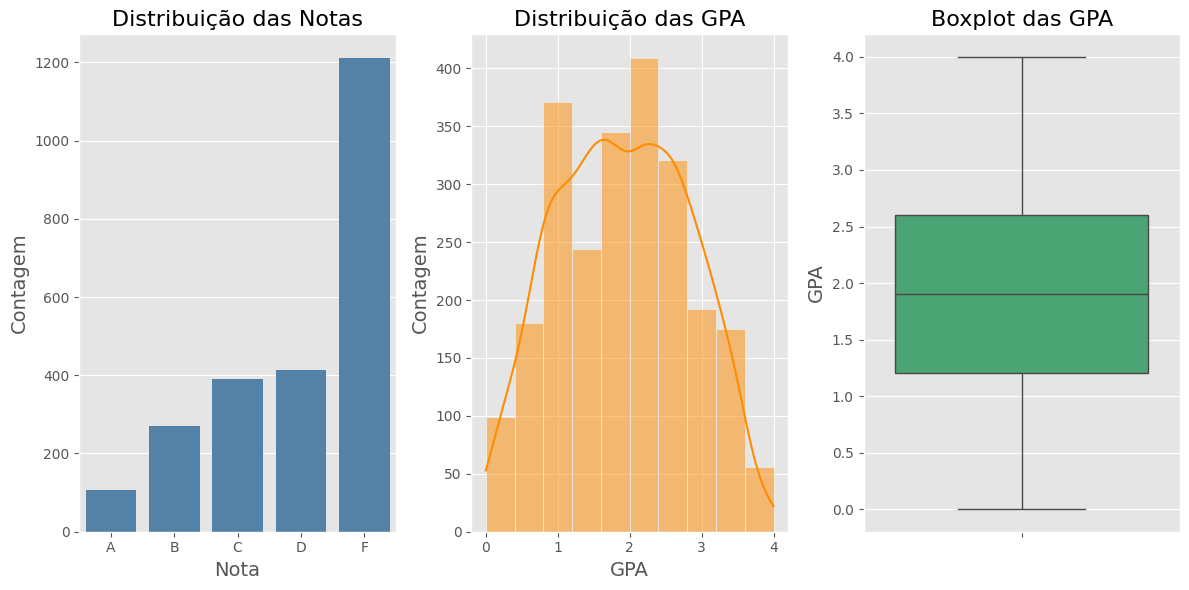

In [8]:
#Criando a figura
fig, axes = plt.subplots(1,3 , figsize=(12,6))

#Distribuição das Notas dos Alunos
sns.barplot(data = df['GradeClass'].value_counts().reset_index(),
        x = df['GradeClass'].value_counts().sort_index().index,
        y = df['GradeClass'].value_counts().sort_index().values,
        color = 'steelblue',
        ax=axes[0])
axes[0].set_title('Distribuição das Notas', fontsize=16)
axes[0].set_ylabel('Contagem', fontsize=14)
axes[0].set_xlabel('Nota', fontsize=14)

#Histograma das GPA
sns.histplot(df['GPA'], 
             bins=10, 
             color='darkorange',
             kde=True,
             ax= axes[1])
axes[1].set_title('Distribuição das GPA', fontsize=16)
axes[1].set_ylabel('Contagem', fontsize=14)
axes[1].set_xlabel('GPA', fontsize=14)

#Boxplot das GPA
sns.boxplot(data=df, 
             y = 'GPA',
             color='mediumseagreen',
             ax= axes[2])
axes[2].set_title('Boxplot das GPA', fontsize=16)
axes[2].set_ylabel('GPA', fontsize=14)

#Ajustando o Layout
plt.tight_layout()
plt.show()
        

Insights:
- Mais de 50% dos alunos tem nota F (GPA<2).

Em seguida, vamos conferir a distribuição das característica dos alunos:

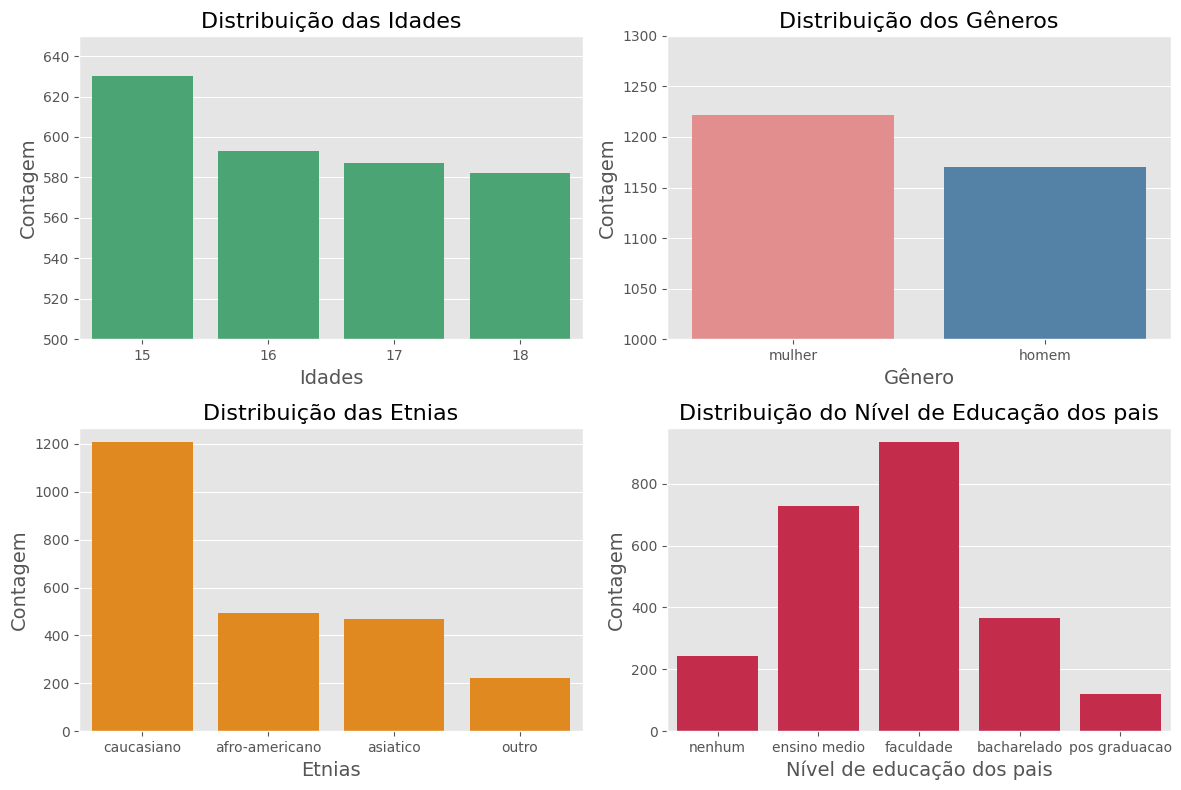

In [9]:
#Criando a figura
fig, axes = plt.subplots(2,2,figsize=(12,8))

#Distribuição das Idades
sns.barplot(data=df['Age'].value_counts().reset_index(),
            x=df['Age'].value_counts().sort_index().index,
            y=df['Age'].value_counts().sort_index().values,
            color='mediumseagreen',
            ax=axes[0,0])
axes[0,0].set_ylim(500,650)
axes[0,0].set_title('Distribuição das Idades', fontsize=16)
axes[0,0].set_ylabel('Contagem', fontsize=14)
axes[0,0].set_xlabel('Idades', fontsize=14)

#Distribuição dos Gêneros
sns.barplot(data=df['Gender'].value_counts().reset_index(),
            x=df['Gender'].value_counts().index,
            y=df['Gender'].value_counts().values,
            palette=['lightcoral', 'steelblue'],
            hue='Gender',
            legend=False,
            ax=axes[0,1])
axes[0,1].set_ylim(1000,1300)
axes[0,1].set_title('Distribuição dos Gêneros', fontsize=16)
axes[0,1].set_ylabel('Contagem', fontsize=14)
axes[0,1].set_xlabel('Gênero', fontsize=14)

#Distribuição das Etninas
sns.barplot(data=df['Ethnicity'].value_counts().reset_index(),
            x=df['Ethnicity'].value_counts().index,
            y=df['Ethnicity'].value_counts().values,
            color='darkorange',
            ax=axes[1,0])
axes[1,0].set_title('Distribuição das Etnias', fontsize=16)
axes[1,0].set_ylabel('Contagem', fontsize=14)
axes[1,0].set_xlabel('Etnias', fontsize=14)

#Distribuição da Educação dos Pais
order = ['nenhum', 'ensino medio', 'faculdade', 'bacharelado', 'pos graduacao']

sns.barplot(data=df['ParentalEducation'].value_counts().reset_index(),
            x=df['ParentalEducation'].value_counts().index,
            y=df['ParentalEducation'].value_counts().values,
            color='Crimson',
            order=order,
            ax=axes[1,1])
axes[1,1].set_title('Distribuição do Nível de Educação dos pais', fontsize=16)
axes[1,1].set_ylabel('Contagem', fontsize=14)
axes[1,1].set_xlabel('Nível de educação dos pais', fontsize=14)

#Ajustando o Layout
plt.tight_layout()
plt.show()

Agora, vamos olhar para os hábitos dos estudantes:

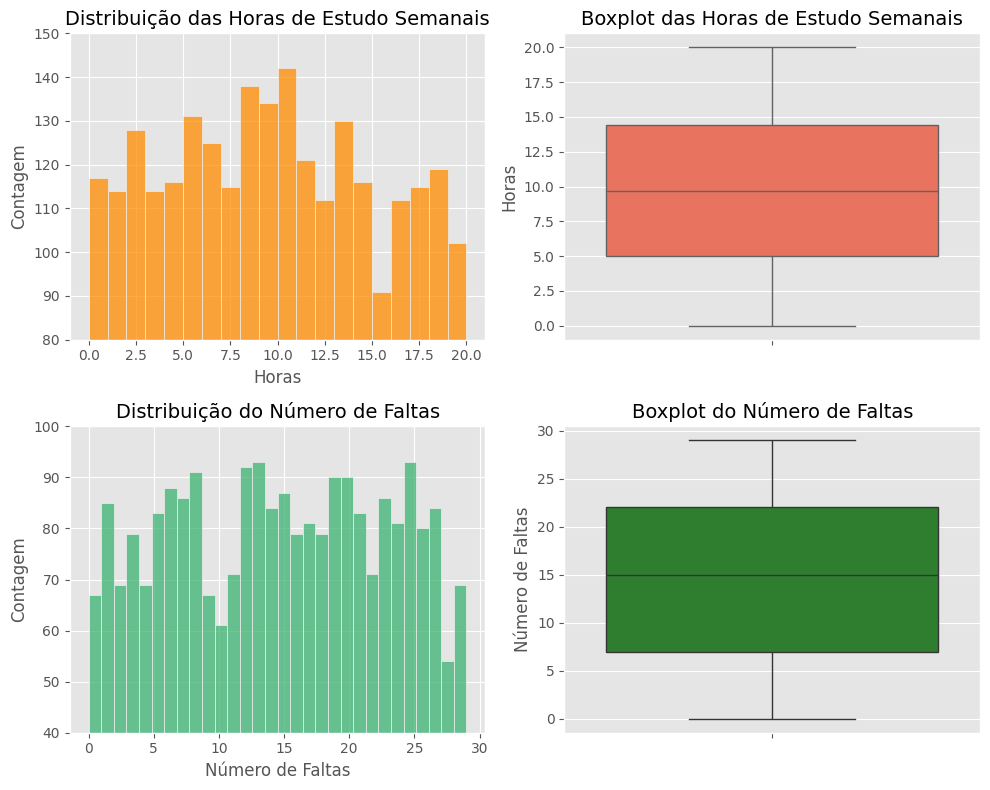

In [10]:
#Criando a figura
fig, axes = plt.subplots(2,2,figsize=(10,8))

#Histograma das Horas de Estudo Semanais
sns.histplot(df['StudyTimeWeekly'], 
             bins=20, 
             color='darkorange',
             ax= axes[0,0])
axes[0,0].set_ylim(80,150)
axes[0,0].set_title('Distribuição das Horas de Estudo Semanais', fontsize=14)
axes[0,0].set_ylabel('Contagem', fontsize=12)
axes[0,0].set_xlabel('Horas', fontsize=12)

#Boxplot das horas de Estudo Semanais
sns.boxplot(data=df, 
             y = 'StudyTimeWeekly',
             color='tomato',
             ax= axes[0,1])
axes[0,1].set_title('Boxplot das Horas de Estudo Semanais', fontsize=14)
axes[0,1].set_ylabel('Horas', fontsize=12)

#Histograma do Número de Faltas
sns.histplot(df['Absences'], 
             bins=30, 
             color='mediumseagreen',
             ax= axes[1,0])
axes[1,0].set_ylim(40,100)
axes[1,0].set_title('Distribuição do Número de Faltas', fontsize=14)
axes[1,0].set_ylabel('Contagem', fontsize=12)
axes[1,0].set_xlabel('Número de Faltas', fontsize=12)

#Boxplot do Número de Faltas
sns.boxplot(data=df, 
             y = 'Absences',
             color='forestgreen',
             ax= axes[1,1])
axes[1,1].set_title('Boxplot do Número de Faltas', fontsize=14)
axes[1,1].set_ylabel('Número de Faltas', fontsize=12)

#Ajustando o Layout
plt.tight_layout()
plt.show()

Insights:
- Mais de 50% dos alunos estudam 10 horas ou menos por semana.
- Aproximadamente 25% dos alunos estudam 5 horas ou menos por semana.
- Menos de 25% dos alunos estudam 15 horas ou mais por semana.
- Metade dos alunos faltaram 15 vezes ou mais durante o ano.
- Nenhum aluno teve 30 faltas, se esse era o limite de faltas anuais, não tiveram reprovados por falta.

Na próxima análise, iremos explorar o nível de ajuda que os alunos tiveram ao longo do :

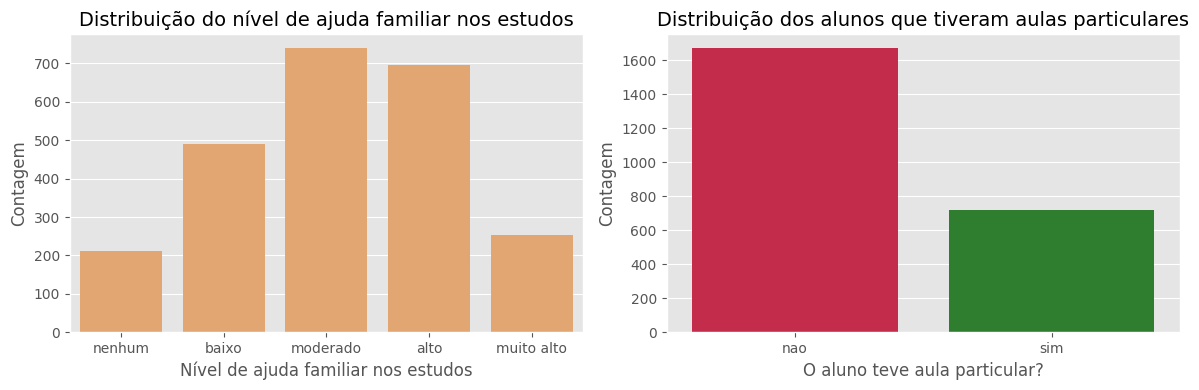

In [11]:
#Criando a figura
fig, axes = plt.subplots(1,2,figsize=(12,4))

#Distribuição do Nível de Ajuda Familiar noes Estudos
order = ['nenhum', 'baixo', 'moderado', 'alto', 'muito alto']
sns.barplot(data=df['ParentalSupport'].value_counts().reset_index(),
            x=df['ParentalSupport'].value_counts().index,
            y=df['ParentalSupport'].value_counts().values,
            color='sandybrown',
            order=order,
            ax=axes[0])
axes[0].set_title('Distribuição do nível de ajuda familiar nos estudos', fontsize = 14)
axes[0].set_ylabel('Contagem', fontsize=12)
axes[0].set_xlabel('Nível de ajuda familiar nos estudos', fontsize=12)

#Distribuição de Aulas Particulares
sns.barplot(data=df['Tutoring'].value_counts().reset_index(),
            x=df['Tutoring'].value_counts().index,
            y=df['Tutoring'].value_counts().values,
            hue='Tutoring',
            palette=['crimson', 'forestgreen'],
            ax=axes[1],
            legend=False)
axes[1].set_title('Distribuição dos alunos que tiveram aulas particulares', fontsize = 14)
axes[1].set_ylabel('Contagem', fontsize=12)
axes[1].set_xlabel('O aluno teve aula particular?', fontsize=12)

#Ajustando o layout
plt.tight_layout()
plt.show()

Para finalizar as análises univariadas, vamos ver se os alunos estão matriculados em atividades extracurriculares:

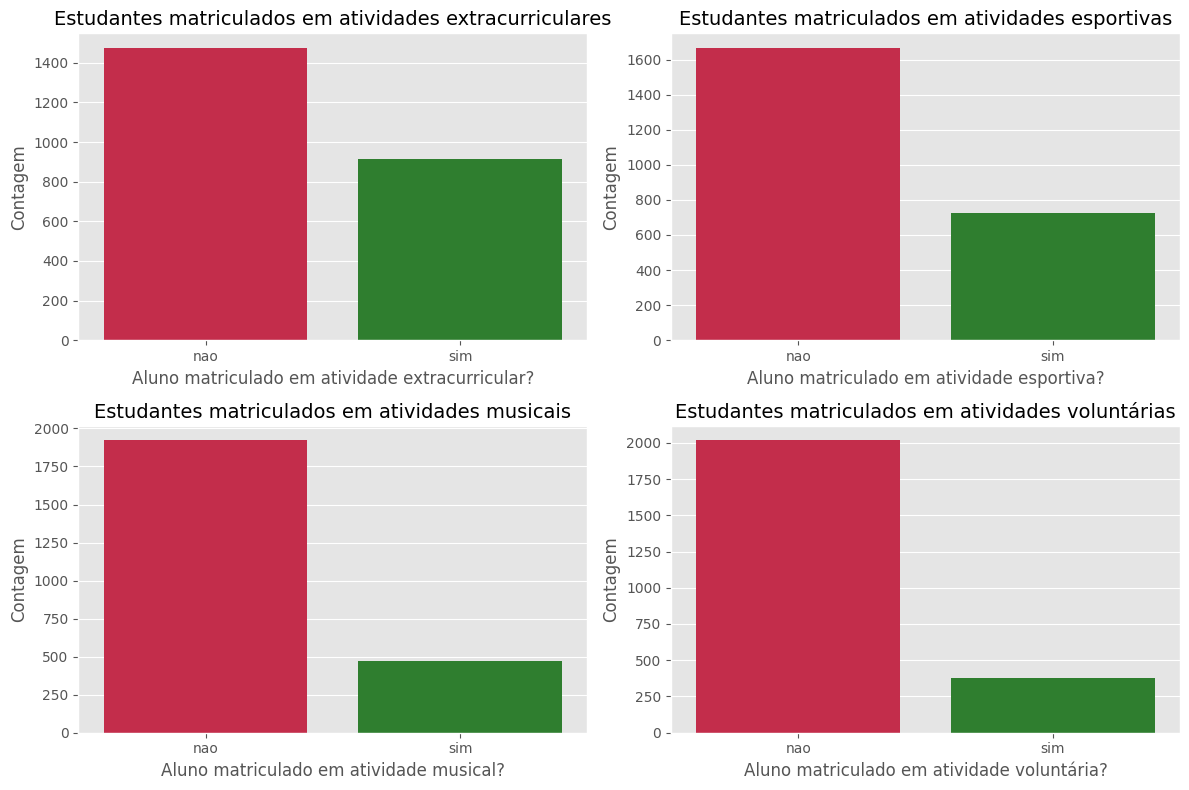

In [12]:
#Criando a figura
fig, axes = plt.subplots(2,2,figsize=(12,8))

#Distribuição de Atividades Extracurriculares
sns.barplot(data=df['Extracurricular'].value_counts().reset_index(),
            x=df['Extracurricular'].value_counts().index,
            y=df['Extracurricular'].value_counts().values,
            hue='Extracurricular',
            palette=['crimson', 'forestgreen'],
            ax=axes[0,0],
            legend=False)
axes[0,0].set_title('Estudantes matriculados em atividades extracurriculares', fontsize = 14)
axes[0,0].set_ylabel('Contagem', fontsize=12)
axes[0,0].set_xlabel('Aluno matriculado em atividade extracurricular?', fontsize=12)

#Distribuição de Atividades Esportivas
sns.barplot(data=df['Sports'].value_counts().reset_index(),
            x=df['Sports'].value_counts().index,
            y=df['Sports'].value_counts().values,
            hue='Sports',
            palette=['crimson', 'forestgreen'],
            ax=axes[0,1],
            legend=False)
axes[0,1].set_title('Estudantes matriculados em atividades esportivas', fontsize = 14)
axes[0,1].set_ylabel('Contagem', fontsize=12)
axes[0,1].set_xlabel('Aluno matriculado em atividade esportiva?', fontsize=12)

#Distribuição de Atividades Musicais
sns.barplot(data=df['Music'].value_counts().reset_index(),
            x=df['Music'].value_counts().index,
            y=df['Music'].value_counts().values,
            hue='Music',
            palette=['crimson', 'forestgreen'],
            ax=axes[1,0],
            legend=False)
axes[1,0].set_title('Estudantes matriculados em atividades musicais', fontsize = 14)
axes[1,0].set_ylabel('Contagem', fontsize=12)
axes[1,0].set_xlabel('Aluno matriculado em atividade musical?', fontsize=12)

#Distribuição de Atividades Voluntárias
sns.barplot(data=df['Volunteering'].value_counts().reset_index(),
            x=df['Volunteering'].value_counts().index,
            y=df['Volunteering'].value_counts().values,
            hue='Volunteering',
            palette=['crimson', 'forestgreen'],
            ax=axes[1,1],
            legend=False)
axes[1,1].set_title('Estudantes matriculados em atividades voluntárias', fontsize = 14)
axes[1,1].set_ylabel('Contagem', fontsize=12)
axes[1,1].set_xlabel('Aluno matriculado em atividade voluntária?', fontsize=12)

#Ajustando Layout
plt.tight_layout()
plt.show()

# ANÁLISE BIVARIADA

Agora, testaremos hipóteses para ver como as nossas variáveis afetam o desempenho acadêmico dos alunos.

O primeiro cruzamento que irei fazer, será verificar o quanto o tempo de estudo e o número de faltas afetam o desempenho final do aluno. Para fazer isso, irei relacionar duas variáveis numéricas, por meio de um gráfico de regressão:

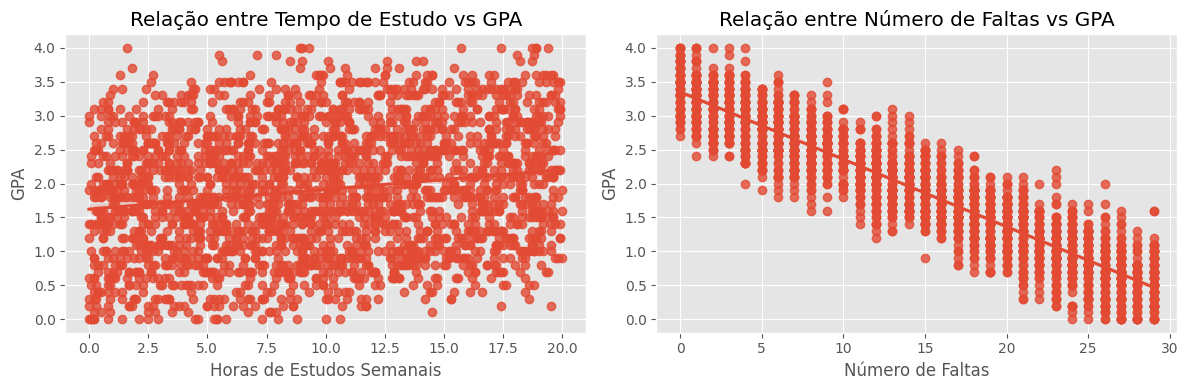

In [16]:
#Criando a figura
fig, axes = plt.subplots(1,2,figsize=(12,4))

#Relação Tempo de Estudo Semanal vs GPA
sns.regplot(data=df,
            x=df["StudyTimeWeekly"],
            y=df['GPA'],
            ax=axes[0])
axes[0].set_title("Relação entre Tempo de Estudo vs GPA")
axes[0].set_ylabel("GPA")
axes[0].set_xlabel("Horas de Estudos Semanais")

#Relação entre número de faltas vs GPA
sns.regplot(data=df,
            x=df["Absences"],
            y=df['GPA'],
            ax=axes[1])
axes[1].set_title("Relação entre Número de Faltas vs GPA")
axes[1].set_ylabel("GPA")
axes[1].set_xlabel("Número de Faltas")

#Ajustando o Layout
plt.tight_layout()
plt.show()

Insights:
- Por mais curioso que pareça, o tempo de estudo semanal não tem uma correlação significante com a nota final do aluno.
- O número de faltas tem uma correlação indireta e muito forte com a nota final do aluno. Quanto mais faltas, menor tende ser a nota.

Agora, por viés de curiosidade, vamos ver se o tempo de estudo semanal está de alguma forma relacionado ao número de faltas anual:

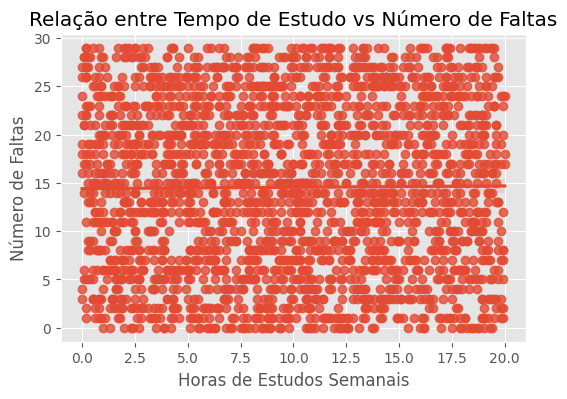

In [17]:
#Criando a figura
fig, axes = plt.subplots(figsize=(6,4))

#Relação Tempo de Estudo Semanal vs Número de Faltas
sns.regplot(data=df,
            x=df["StudyTimeWeekly"],
            y=df['Absences'])
plt.title("Relação entre Tempo de Estudo vs Número de Faltas")
plt.ylabel("Número de Faltas")
plt.xlabel("Horas de Estudos Semanais")
plt.show()

Insights:
- Não há uma correlação significante entre horas de estudo semanais e número de faltas, ou seja, não é recorrente um aluno faltar a aula para estudar mais em casa.

Para ter maior certeza, vamos verificar a matriz de correlação:

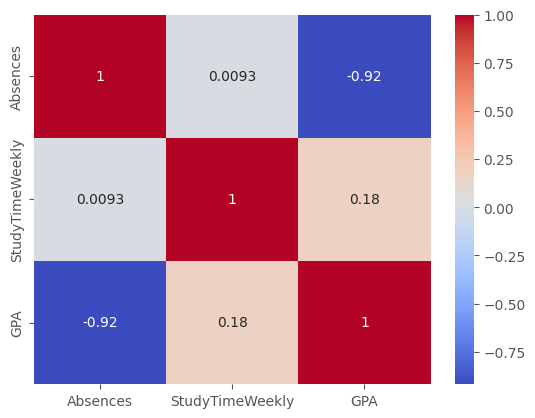

In [82]:
subset_students = df[['Absences','StudyTimeWeekly','GPA']]
matriz_de_correlacao = subset_students.corr()

#Gerando um mapa de calor com a matriz de correlação
sns.heatmap(matriz_de_correlacao, annot=True, cmap='coolwarm')
plt.show()

Como esperado, o número de faltas e a nota final tem uma correlação muito forte, enquanto o tempo de estudo semanal tem uma relação bem fraca tanto com o número de faltas, tanto com o desempenho escolar.

Dando continuidade, vamos ver as notas médias com base nas características dos alunos:

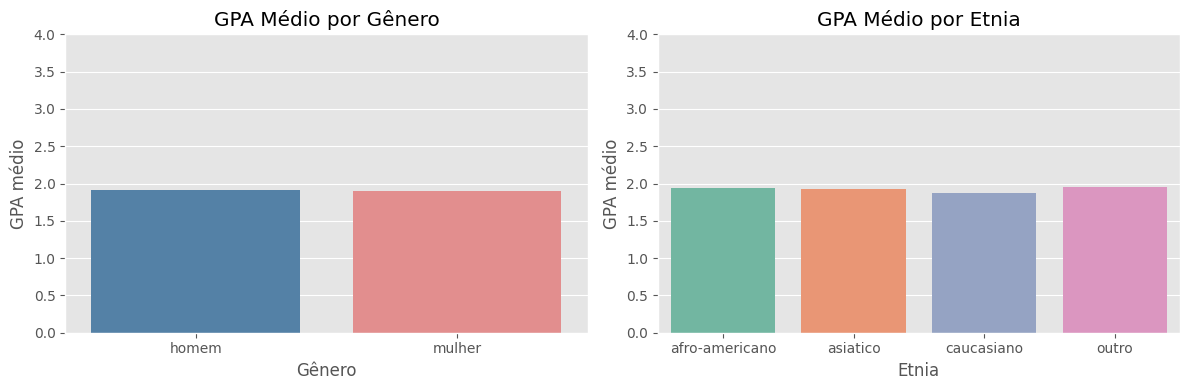

In [ ]:
#Criando a figura
fig, axes = plt.subplots(1,2,figsize=(12,4))

#Agrupando por Gênero
gender_mean = df.groupby("Gender")['GPA'].mean().reset_index()

#Nota média por Gênero
sns.barplot(data=gender_mean,
            y=gender_mean['GPA'],
            x=gender_mean['Gender'],
            palette=['steelblue', 'lightcoral'],
            hue='Gender',
            ax=axes[0],
            legend=False)
axes[0].set_ylim(0,4)
axes[0].set_title('GPA Médio por Gênero')
axes[0].set_ylabel('GPA médio')
axes[0].set_xlabel('Gênero')

#Agrupando por Etnia
ethnicity_mean = df.groupby("Ethnicity")['GPA'].mean().reset_index()

#Nota média por Etnia
sns.barplot(data=ethnicity_mean,
            y=ethnicity_mean['GPA'],
            x=ethnicity_mean['Ethnicity'],
            palette='Set2',
            hue='Ethnicity',
            ax=axes[1],
            legend=False)
axes[1].set_ylim(0,4)
axes[1].set_title('GPA Médio por Etnia')
axes[1].set_ylabel('GPA médio')
axes[1].set_xlabel('Etnia')

#Ajustando o Layout
plt.tight_layout()
plt.show()

Insights:
- A nota média não apresenta diferenças significantivas com base na característica dos alunos, permanecendo bastante uniforme em todos os grupos.

A seguir, checaremos o desempenho acadêmico separdo pela atividade extracurricular do aluno.

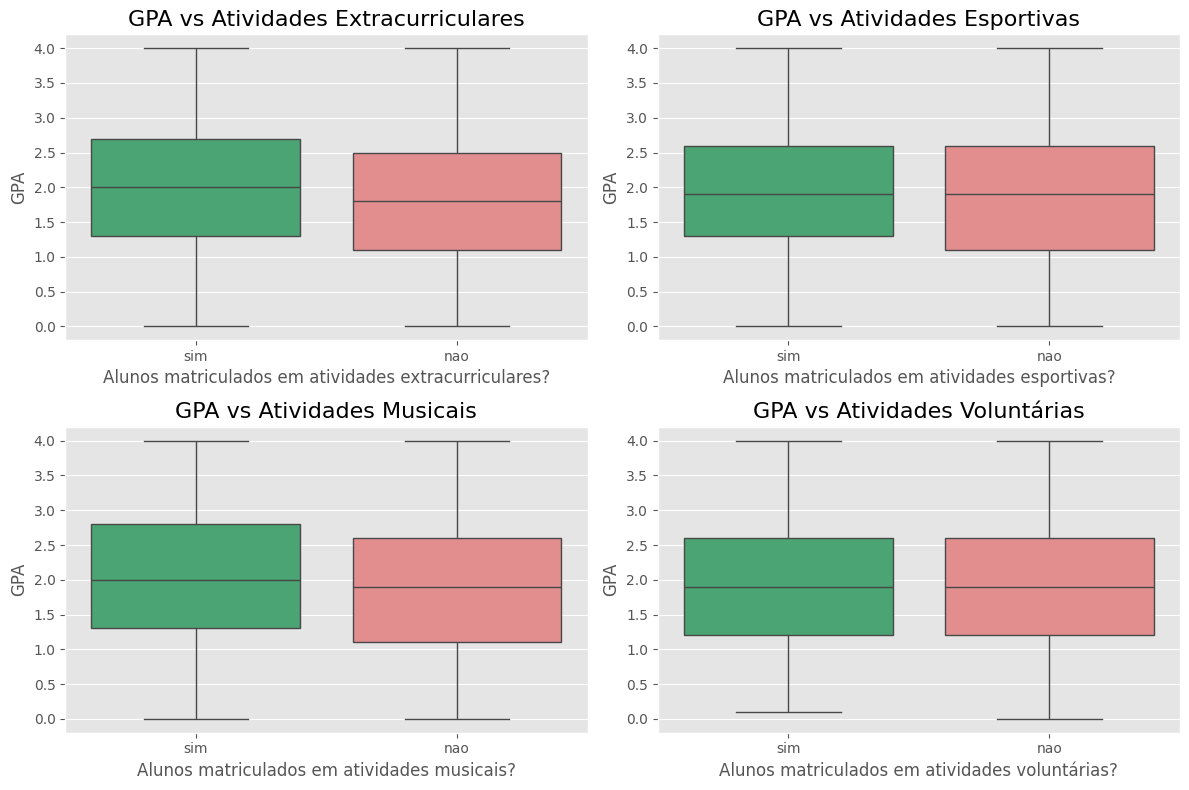

In [43]:
#Criando a figura
fig, axes = plt.subplots(2,2,figsize=(12,8))

#Definindo a ordem dos boxplot
order = ['sim', 'nao']

#Boxplots
sns.boxplot(data=df, x=df['Extracurricular'], y=df['GPA'], hue='Extracurricular', palette={'sim':'mediumseagreen', 'nao':'lightcoral'}, ax=axes[0,0], legend=False, order=order)
sns.boxplot(data=df, x=df['Sports'], y=df['GPA'], hue='Sports', palette={'sim':'mediumseagreen', 'nao':'lightcoral'}, ax=axes[0,1], legend=False, order=order)
sns.boxplot(data=df, x=df['Music'], y=df['GPA'], hue='Music', palette={'sim':'mediumseagreen', 'nao':'lightcoral'}, ax=axes[1,0], legend=False, order=order)
sns.boxplot(data=df, x=df['Volunteering'], y=df['GPA'], hue = 'Volunteering', palette={'sim':'mediumseagreen', 'nao':'lightcoral'},  ax=axes[1,1], legend=False, order=order)

#Nomeando os gráficos
axes[0,0].set_title('GPA vs Atividades Extracurriculares', fontsize=16)
axes[0,0].set_ylabel('GPA')
axes[0,0].set_xlabel('Alunos matriculados em atividades extracurriculares?')
axes[0,1].set_title('GPA vs Atividades Esportivas',fontsize=16)
axes[0,1].set_ylabel('GPA')
axes[0,1].set_xlabel('Alunos matriculados em atividades esportivas?')
axes[1,0].set_title('GPA vs Atividades Musicais',fontsize=16)
axes[1,0].set_ylabel('GPA')
axes[1,0].set_xlabel('Alunos matriculados em atividades musicais?')
axes[1,1].set_title('GPA vs Atividades Voluntárias',fontsize=16)
axes[1,1].set_ylabel('GPA')
axes[1,1].set_xlabel('Alunos matriculados em atividades voluntárias?')

#Ajustando o Layout
plt.tight_layout()
plt.show()

Insights:
- Os alunos matriculados em atividades extracurriculares no geral, tendem a ter um melhor desempenho escolar ao que não estão, o que é curioso, pois na teoria eles teriam menos tempo para estudar.
- Há uma tendência de alunos envolvidos em atividades musicais apresentarem um desempenho escolar ligeiramente melhor aos que não estão.


Por conta do resultado curioso da última análise, irei comparar o tempo de estudo médio e o número de faltas dos alunos que estão envolvidos em atividades extracurriculares e os alunos que não estão.

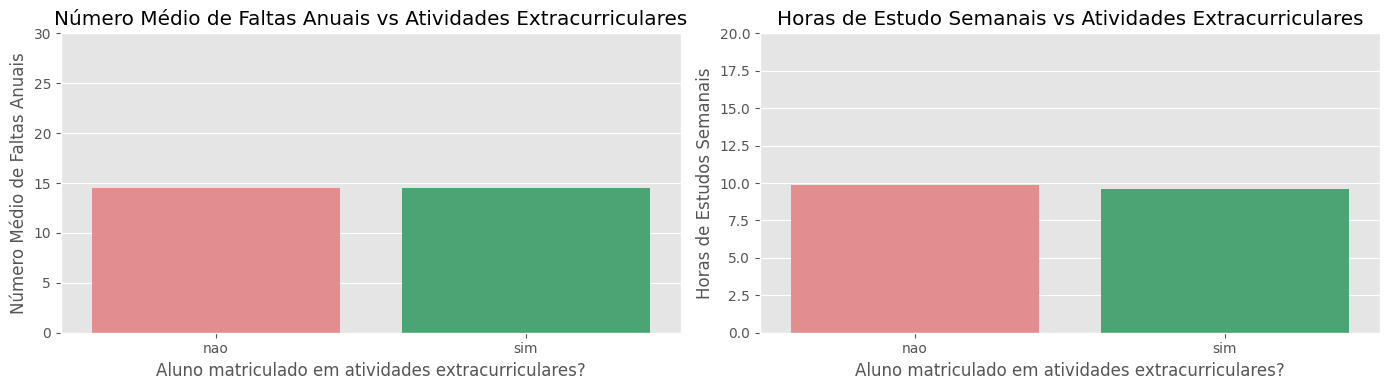

In [58]:
#Criando figura
fig, axes = plt.subplots(1,2,figsize=(14,4))

#Agrupando Atividade extracurricular x Número de Faltas
extra_absences = df.groupby("Extracurricular")['Absences'].mean().reset_index()

#Atividades EXtracurriculares vs N° de Faltas
sns.barplot(data=extra_absences,
            y=extra_absences['Absences'],
            x=extra_absences['Extracurricular'],
            palette=['lightcoral', 'mediumseagreen'],
            hue='Extracurricular',
            legend=False,
            ax=axes[0])
axes[0].set_ylim(0,30)
axes[0].set_title('Número Médio de Faltas Anuais vs Atividades Extracurriculares')
axes[0].set_ylabel('Número Médio de Faltas Anuais')
axes[0].set_xlabel('Aluno matriculado em atividades extracurriculares?')

#Agrupando Atividade extracurricular x Tempo de Estudo Semanal
extra_study = df.groupby("Extracurricular")['StudyTimeWeekly'].mean().reset_index()

#Atividades EXtracurriculares vs Tempo de Estudo Semanal
sns.barplot(data=extra_study,
            y=extra_study['StudyTimeWeekly'],
            x=extra_study['Extracurricular'],
            palette=['lightcoral', 'mediumseagreen'],
            hue='Extracurricular',
            legend=False,
            ax=axes[1])
axes[1].set_ylim(0,20)
axes[1].set_title('Horas de Estudo Semanais vs Atividades Extracurriculares')
axes[1].set_ylabel('Horas de Estudos Semanais')
axes[1].set_xlabel('Aluno matriculado em atividades extracurriculares?')

#Ajustando Layout
plt.tight_layout()
plt.show()

Minha teoria estava errada, as atividades extracurriculares não têm um impacto negativo na dedicação escolar do aluno. O número médio de horas de estudo e faltas anuais são bem uniformes aos alunos matriculados e não matriculados em atividades fora do currículo escolar.

Vamos conferir agora, como o nível de ajuda que o aluno recebe interfere no desempenho acadêmico dele:

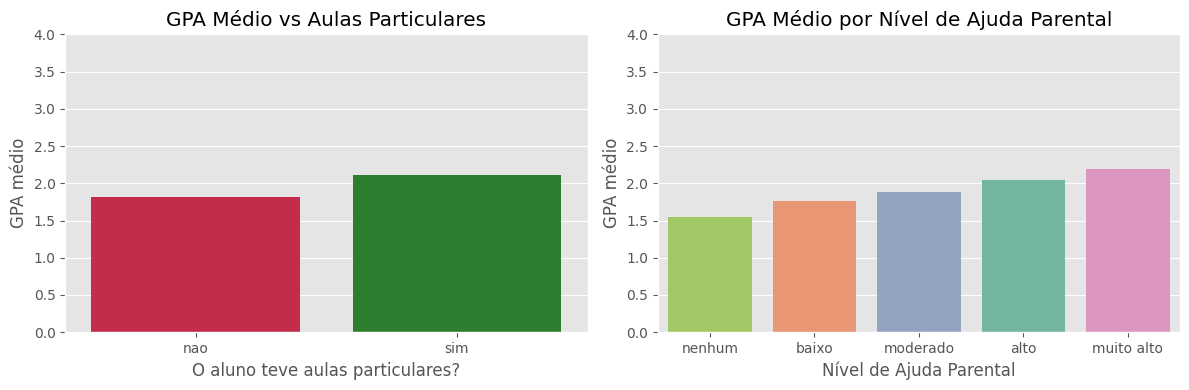

In [62]:
#Criando a figura
fig, axes = plt.subplots(1,2,figsize=(12,4))

#Agrupando por Aulas Particulares
tutoring_mean = df.groupby("Tutoring")['GPA'].mean().reset_index()

#Nota média vs Aulas Particulares
sns.barplot(data=tutoring_mean,
            y=tutoring_mean['GPA'],
            x=tutoring_mean['Tutoring'],
            palette=['crimson', 'forestgreen'],
            hue='Tutoring',
            ax=axes[0],
            legend=False)
axes[0].set_ylim(0,4)
axes[0].set_title('GPA Médio vs Aulas Particulares')
axes[0].set_ylabel('GPA médio')
axes[0].set_xlabel('O aluno teve aulas particulares?')

#Agrupando por Ajuda Parental
parental_help_mean = df.groupby("ParentalSupport")['GPA'].mean().reset_index()

#Definindo ordem das Barras
order=['nenhum','baixo', 'moderado', 'alto', 'muito alto']

#Nota média por Nível de Ajuda Parental
sns.barplot(data=parental_help_mean,
            y=parental_help_mean['GPA'],
            x=parental_help_mean['ParentalSupport'],
            palette='Set2',
            hue='ParentalSupport',
            ax=axes[1],
            legend=False,
            order=order)
axes[1].set_ylim(0,4)
axes[1].set_title('GPA Médio por Nível de Ajuda Parental')
axes[1].set_ylabel('GPA médio')
axes[1].set_xlabel('Nível de Ajuda Parental')

#Ajustando o Layout
plt.tight_layout()
plt.show()

Insights:
- Os alunos que tiveram aula particular tendem a ter melhores desempenhos acadêmicos aos que não tiveram.
- Quanto maior o nível de ajuda parental, maior tende a ser o desempenho escolar do aluno.

E para finalizar nossa análise, vamos ver se a educação dos pais influencia no desempenho escolar dos alunos:

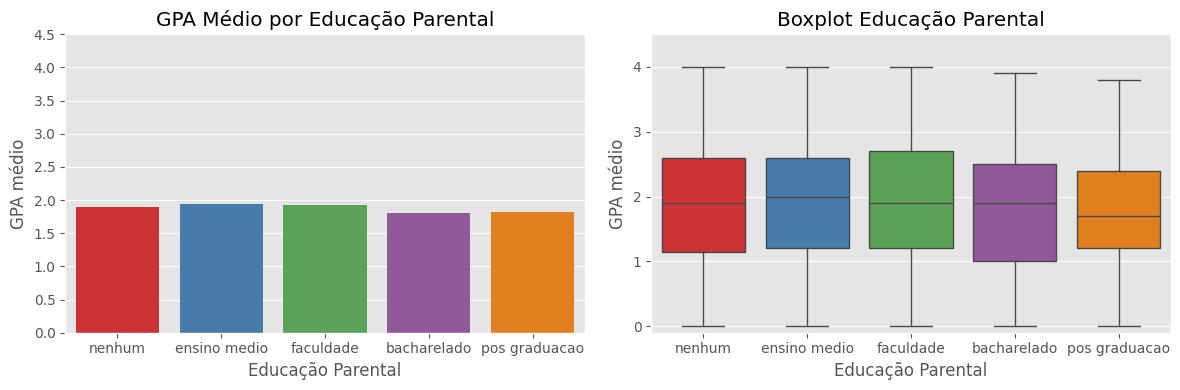

In [80]:
#Criando a figura
fig, axes = plt.subplots(1,2,figsize=(12,4))

#Agrupando por Educação Parental
parental_education_mean = df.groupby("ParentalEducation")['GPA'].mean().reset_index()

#Definindo ordem das barras e as cores
order=['nenhum','ensino medio', 'faculdade', 'bacharelado', 'pos graduacao']
color_palette = {'nenhum': '#e41a1c', 'ensino medio': '#377eb8', 'faculdade': '#4daf4a', 'bacharelado': '#984ea3', 'pos graduacao': '#ff7f00'}

#Nota média por Educação Parental
sns.barplot(data=parental_education_mean,
            y=parental_education_mean['GPA'],
            x=parental_education_mean['ParentalEducation'],
            palette=color_palette,
            hue='ParentalEducation',
            ax=axes[0],
            legend=False,
            order=order)
axes[0].set_ylim(0,4.5)
axes[0].set_title('GPA Médio por Educação Parental')
axes[0].set_ylabel('GPA médio')
axes[0].set_xlabel('Educação Parental')

#Boxplot Educação Parental
sns.boxplot(data=df,
            y=df['GPA'],
            x=df['ParentalEducation'],
            palette=color_palette,
            hue='ParentalEducation',
            ax=axes[1],
            legend=False,
            order=order)
axes[1].set_ylim(-0.1,4.5)
axes[1].set_title('Boxplot Educação Parental')
axes[1].set_ylabel('GPA médio')
axes[1].set_xlabel('Educação Parental')
#Ajustando Layout
plt.tight_layout()
plt.show()

Insights:
- A educação parental não parece ter tanta relação com o desempenho escolar do aluno.
- Por mais ligeira que a diferença seja, os alunos os quais os pais possuem pós-graduação tem notas inferiores. Talvez porque há poucos alunos com essa condição.

# CONCLUSÃO

Feita a análise exploratória dos dados, conseguimos obter insights valiosos. Primeiramente, checamos como os dados estão distribuídos em cada variável e depois vimos como cada variável impacta no GPA (nota média de cada aluno).

Conseguimos tirar as seguintes informações das análises:
- Mais de 50% dos alunos tem nota F (GPA<2)
- Mais de 50% dos alunos estudam 10 horas ou menos por semana.
- Aproximadamente 25% dos alunos estudam 5 horas ou menos por semana.
- Menos de 25% dos alunos estudam 15 horas ou mais por semana.
- Metade dos alunos faltaram 15 vezes ou mais durante o ano.
- Nenhum aluno teve 30 faltas, se esse era o limite de faltas anuais, não tiveram reprovados por falta.
- Por mais curioso que pareça, o tempo de estudo semanal não tem uma correlação significante (0.18) com a nota final do aluno.
- O número de faltas tem uma correlação indireta e muito forte (-0.92) com a nota final do aluno. Quanto mais faltas, menor tende ser a nota.
- Não há uma correlação significante (0,0093) entre horas de estudo semanais e número de faltas, ou seja, não é recorrente um aluno faltar a aula para estudar mais em casa.
- A nota média não apresenta diferenças significantivas com base na característica dos alunos, permanecendo bastante uniforme em todos os grupos.
- Os alunos matriculados em atividades extracurriculares no geral, tendem a ter um melhor desempenho escolar ao que não estão, o que é curioso, pois na teoria eles teriam menos tempo para estudar.
- Há uma tendência de alunos envolvidos em atividades musicais apresentarem um desempenho escolar ligeiramente melhor aos que não estão.
- Os alunos que tiveram aula particular tendem a ter melhores desempenhos acadêmicos aos que não tiveram.
- Quanto maior o nível de ajuda parental, maior tende a ser o desempenho escolar do aluno.
Insights:
- A educação parental não parece ter tanta relação com o desempenho escolar do aluno.
- Por mais ligeira que a diferença seja, os alunos os quais os pais possuem pós-graduação tem notas inferiores. Talvez porque há poucos alunos com essa condição.